## Primeiro contato com analise de dados geoespaciais
Curso base: [Introduction to geopandas](https://www.youtube.com/watch?v=CtPqQP45vl0&list=PLewNEVDy7gq3DjrPDxGFLbHE4G2QWe8Qh)


In [151]:
# bibliotecas que usaremos 99% das vezes
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, Polygon
%matplotlib inline

In [152]:
# bibliotecas para ter um mapa base e customizado
# from mpl_toolkits.basemap import Basemap
# import matplotlib.pyplot as plt

In [153]:
# bibliotecas para transformar enderecos em coordenadas
# from geopy.geocoders import Nominatim
# from geopy.geocoders import GoogleV3

### Trabalhando com Shapefiles

infos:
https://geopandas.org/en/stable/docs/reference/api/geopandas.read_file.html
https://geopandas.org/en/stable/docs/user_guide/mapping.html

In [154]:
# importando arquivo shapefile (poderia ser qualquer formato) e imprime primeiras 5 linhas
distritos = gpd.read_file("./data/shapes/distritos/Distritos_2017_region.shp")
distritos.head()

,NumeroDist,NomeDistri,Area_ha,geometry
0,1,Água Rasa,715.05,"POLYGON Z ((341424.968 7392693.358 0.000, 3414..."
1,2,Alto de Pinheiros,751.26,"POLYGON Z ((327280.093 7394982.866 0.000, 3272..."
2,3,Anhanguera,3339.95,"POLYGON Z ((320101.634 7408074.713 0.000, 3200..."
3,4,Aricanduva,686.26,"POLYGON Z ((346773.152 7391533.787 0.000, 3467..."
4,5,Artur Alvim,653.04,"POLYGON Z ((349640.523 7395895.759 0.000, 3496..."


<Axes: >

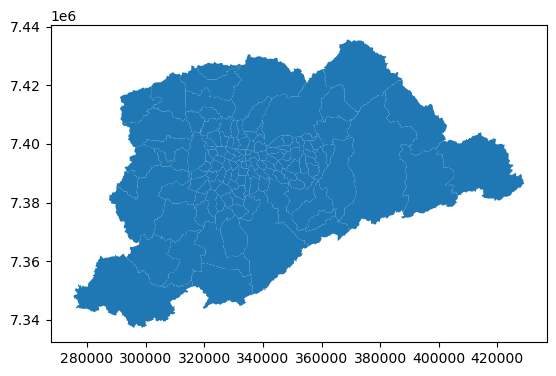

In [155]:
# imprimimos o mapa em si (importante fazer no come;o para ter certeza de que est[a trabalhando com o mapa certo)
distritos.plot()

In [156]:
# filtrando apenas os distritos com mais de 30.000 hectares
mais_de_30000_ha = distritos[distritos.Area_ha > 30000]
mais_de_30000_ha

,NumeroDist,NomeDistri,Area_ha,geometry
98,99,Biritiba-Mirim,31812.79,"POLYGON Z ((386629.172 7394882.983 0.000, 3868..."
102,103,Cotia,32473.94,"POLYGON Z ((308473.154 7392626.909 0.000, 3085..."
110,111,Guarulhos,31941.23,"POLYGON Z ((361247.637 7407399.699 0.000, 3612..."
115,116,Juquitiba,52333.22,"POLYGON Z ((293409.187 7361189.054 0.000, 2934..."
116,117,Mairiporã,32143.99,"POLYGON Z ((329436.079 7409161.437 0.000, 3294..."
118,119,Mogi das Cruzes,71429.19,"POLYGON Z ((368498.753 7401708.434 0.000, 3684..."
124,125,Salesópolis,42596.88,"POLYGON Z ((406630.817 7382408.440 0.000, 4066..."
125,126,Santa Isabel,36414.86,"POLYGON Z ((360498.961 7425477.832 0.000, 3604..."
128,129,São Bernardo do Campo,41038.81,"POLYGON Z ((340153.820 7383644.658 0.000, 3401..."


<Axes: >

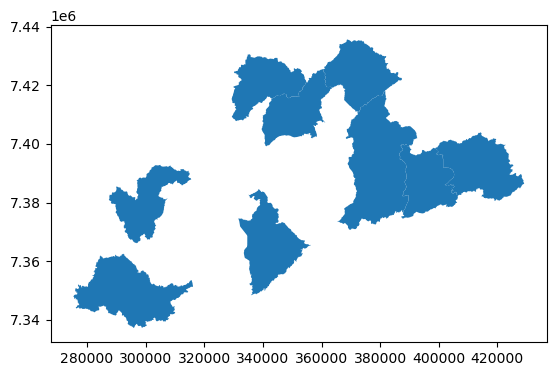

In [157]:
# visualizacao em mapa
mais_de_30000_ha.plot()

### Trabalhando com CSV

In [158]:
df = pd.read_csv("./data/VeiculosSubtraidos_2023.csv", sep=";")
df.head()

,ID_DELEGACIA,NOME_DEPARTAMENTO,NOME_SECCIONAL,NOME_DELEGACIA,NOME_MUNICIPIO,ANO_BO,NUM_BO,VERSAO,CIDADE,ID_CIRCUNSCRICAO,...,LONGITUDE,CONT_VEICULO,DESCR_OCORRENCIA_VEICULO,DESCR_TIPO_VEICULO,DESCR_MARCA_VEICULO,ANO_FABRICACAO,ANO_MODELO,DESC_COR_VEICULO,MÊS,ANO
0,900020,DIPOL - DEPTO DE INTELIGENCIA,DELEGACIA ELETRONICA,DELEGACIA ELETRONICA,S.PAULO,2023,CV1119,2,S.PAULO,10101,...,-46.631488,1000968700,Furtado,Automovel,FORD/ECOSPORT FSL1.6FLEX,2010.0,NaN,Prata,3,2023
1,900020,DIPOL - DEPTO DE INTELIGENCIA,DELEGACIA ELETRONICA,DELEGACIA ELETRONICA,S.PAULO,2023,CX8069,1,S.PAULO,10101,...,-46.637238,1000975535,Furtado,Motociclo,HONDA/XRE 190,2017.0,NaN,Vermelho,3,2023
2,10308,DECAP,DEL.SEC.5º LESTE,52º D.P. PARQUE S.JORGE,S.PAULO,2023,CY4504,1,S.PAULO,10101,...,-46.628131,1000977316,Furtado,Automovel,CHEVROLET/CELTA 1.0L LS,2011.0,2012.0,Preta,3,2023
3,900020,DIPOL - DEPTO DE INTELIGENCIA,DELEGACIA ELETRONICA,DELEGACIA ELETRONICA,S.PAULO,2023,CZ0682,1,S.PAULO,10101,...,-46.630481,1000979294,Furtado,Motociclo,HONDA/LEAD 110,2012.0,NaN,Preta,3,2023
4,900020,DIPOL - DEPTO DE INTELIGENCIA,DELEGACIA ELETRONICA,DELEGACIA ELETRONICA,S.PAULO,2023,CZ6562,1,S.PAULO,10101,...,-46.635526,1000980370,Furtado,Motociclo,HONDA/XRE 300 ABS,2022.0,NaN,Vermelho,3,2023


In [159]:
df1 = df[["ID_DELEGACIA", "BAIRRO", "LONGITUDE", "LATITUDE"]]
df1.head()

,ID_DELEGACIA,BAIRRO,LONGITUDE,LATITUDE
0,900020,SE,-46.631488,-23.555360
1,900020,LIBERDADE,-46.637238,-23.559174
2,10308,SE,-46.628131,-23.556094
3,900020,SE,-46.630481,-23.540328
4,900020,LIBERDADE,-46.635526,-23.557746


In [160]:
# Adicionar uma coluna usando outra como base -> usamos a longitude para criar uma coluna Teste com -1
teste = df.assign(Teste = lambda x: x['LONGITUDE'] - 1)
teste[["ID_DELEGACIA", "LONGITUDE", "Teste"]]

,ID_DELEGACIA,LONGITUDE,Teste
0,900020,-46.631488,-47.631488
1,900020,-46.637238,-47.637238
2,10308,-46.628131,-47.628131
3,900020,-46.630481,-47.630481
4,900020,-46.635526,-47.635526
...,...,...,...
36845,30213,-46.492911,-47.492911
36846,30212,-46.492911,-47.492911
36847,10007,-46.661445,-47.661445
36848,10007,-46.661445,-47.661445


In [161]:
# Criamos uma lista de pontos com base em cada uma das LINHAS do DataFrame
# usamos o par"ametro axis=1 para indicar que a funcao lambda deve ser aplicada as linhas e nao colunas
points = df.apply(lambda row: Point(row["LONGITUDE"], row["LATITUDE"]), axis=1)
points.head()

0    POINT (-46.63148782 -23.55536041)
1    POINT (-46.63723827 -23.55917429)
2    POINT (-46.62813089 -23.55609393)
3    POINT (-46.63048138 -23.54032772)
4    POINT (-46.63552625 -23.55774636)
dtype: object

In [162]:
# Criamos um GeoDataframe (isso eh, um DataFrame que tem uma coluna para a geometria) juntando as duas coisas
gdf = gpd.GeoDataFrame(df, geometry=points)
gdf.crs = { 'init': 'epsg:4326'} #nao se preocupar com isso agora, se for fazer geometria com base em long/lat usar isso
gdf.head()

/home/jkahv/miniconda3/envs/geo_env/lib/python3.11/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


,ID_DELEGACIA,NOME_DEPARTAMENTO,NOME_SECCIONAL,NOME_DELEGACIA,NOME_MUNICIPIO,ANO_BO,NUM_BO,VERSAO,CIDADE,ID_CIRCUNSCRICAO,...,CONT_VEICULO,DESCR_OCORRENCIA_VEICULO,DESCR_TIPO_VEICULO,DESCR_MARCA_VEICULO,ANO_FABRICACAO,ANO_MODELO,DESC_COR_VEICULO,MÊS,ANO,geometry
0,900020,DIPOL - DEPTO DE INTELIGENCIA,DELEGACIA ELETRONICA,DELEGACIA ELETRONICA,S.PAULO,2023,CV1119,2,S.PAULO,10101,...,1000968700,Furtado,Automovel,FORD/ECOSPORT FSL1.6FLEX,2010.0,NaN,Prata,3,2023,POINT (-46.63149 -23.55536)
1,900020,DIPOL - DEPTO DE INTELIGENCIA,DELEGACIA ELETRONICA,DELEGACIA ELETRONICA,S.PAULO,2023,CX8069,1,S.PAULO,10101,...,1000975535,Furtado,Motociclo,HONDA/XRE 190,2017.0,NaN,Vermelho,3,2023,POINT (-46.63724 -23.55917)
2,10308,DECAP,DEL.SEC.5º LESTE,52º D.P. PARQUE S.JORGE,S.PAULO,2023,CY4504,1,S.PAULO,10101,...,1000977316,Furtado,Automovel,CHEVROLET/CELTA 1.0L LS,2011.0,2012.0,Preta,3,2023,POINT (-46.62813 -23.55609)
3,900020,DIPOL - DEPTO DE INTELIGENCIA,DELEGACIA ELETRONICA,DELEGACIA ELETRONICA,S.PAULO,2023,CZ0682,1,S.PAULO,10101,...,1000979294,Furtado,Motociclo,HONDA/LEAD 110,2012.0,NaN,Preta,3,2023,POINT (-46.63048 -23.54033)
4,900020,DIPOL - DEPTO DE INTELIGENCIA,DELEGACIA ELETRONICA,DELEGACIA ELETRONICA,S.PAULO,2023,CZ6562,1,S.PAULO,10101,...,1000980370,Furtado,Motociclo,HONDA/XRE 300 ABS,2022.0,NaN,Vermelho,3,2023,POINT (-46.63553 -23.55775)


<Axes: >

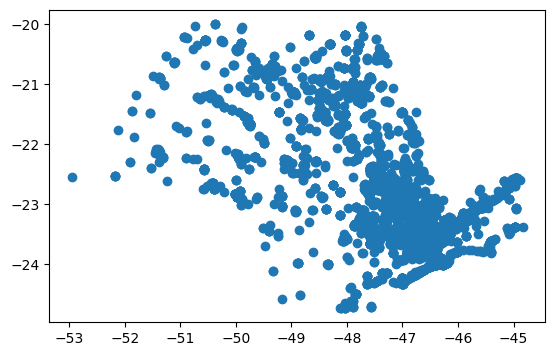

In [163]:
gdf.plot()

### Trabalhando com projecoes

<Axes: >

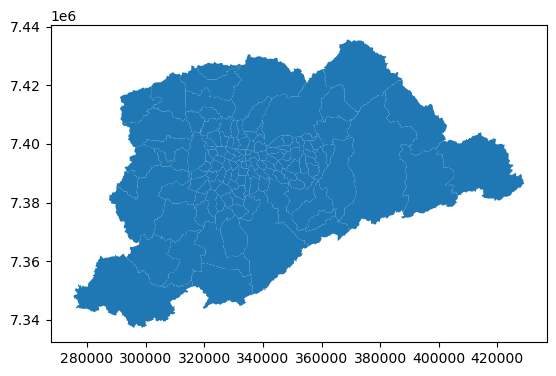

In [164]:
# mapa com projecao inicial
distritos.plot()

<Axes: >

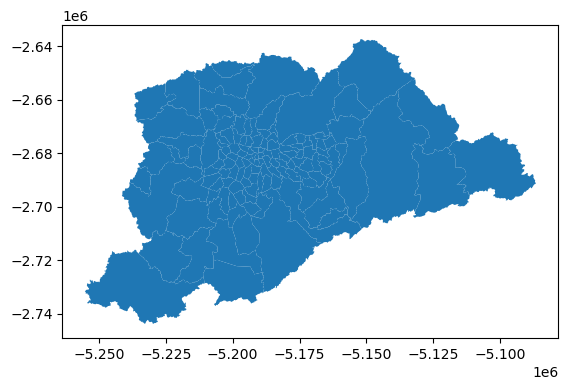

In [165]:
# mapa com projecao Mercator
distritos.to_crs({'proj': 'merc'}).plot()

<Axes: >

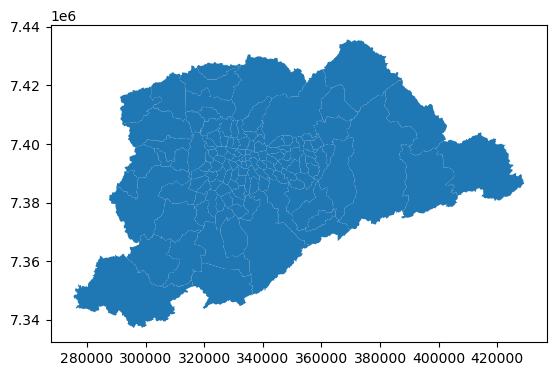

In [166]:
# Mapa com projecao EPSG:5533 > SAD69(96) / UTM zone 23S
# mais utilizados no GeoSampa: EPSG:5533 > SAD69(96) / UTM zone 23S OU EPSG:31983 > SIRGAS_2000_UTM_zone_23S
# mais infos: https://geoinfo-smdu.github.io/tutorial-GeoSampa/
# abrir arquivo .prj para ver nome por extenso e poder procurar
# para encontrar o EPSG usar o site epsg.io e procurar pelo noma por extenso

distritos.to_crs(epsg=5533).plot()

<Axes: >

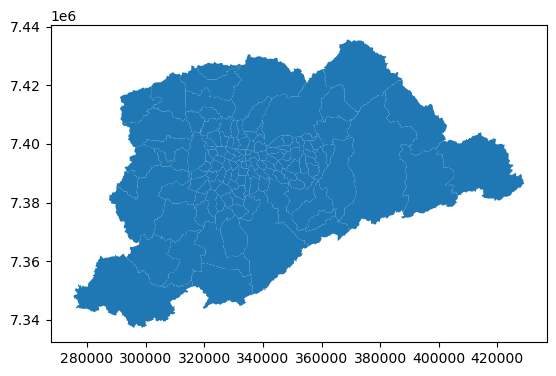

In [167]:
# quando usamos o metodo to_crs nao modificamos o mapa original
# por isso distritos.plot() permanece o mesmo
distritos.plot()

### Configurando o Mapa

<Axes: >

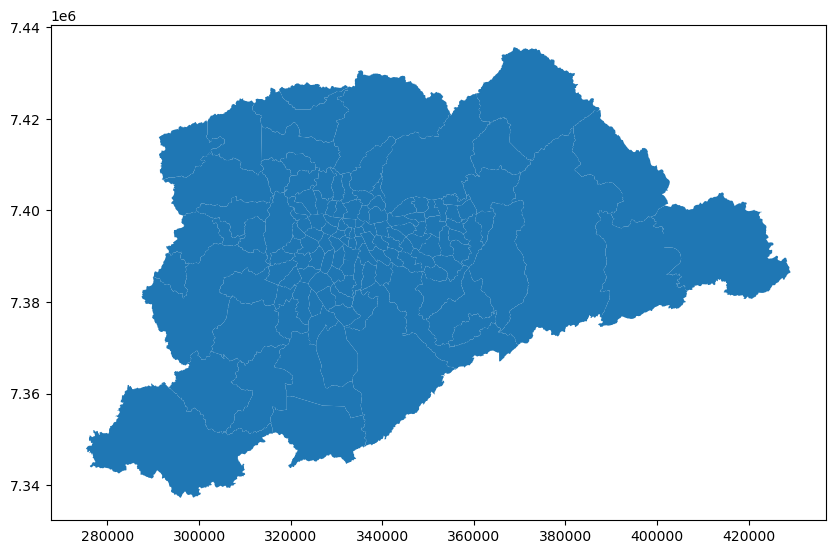

In [168]:
# Modificando as dimensoes da figura
# Atencao: o matplotlib vai manter a proporcao do mapa, independente do seu pedido e vai mostrar no maximo ate a largura do jupyter notebook
distritos.plot(figsize=(10,10))

(267602.9776466094, 436846.4673005015, 7332315.516704407, 7440526.498143018)

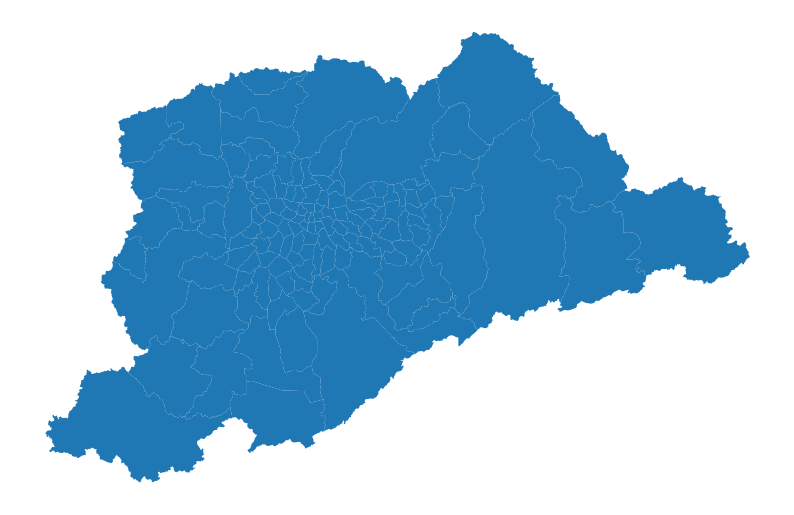

In [169]:
# Removendo os eixos de coordenada
# primeiro guardamos o mapa em uma variavel e depois modificamos essa variavel
ax = distritos.plot(figsize=(10,10))
ax.axis("off")

(267602.9776466094, 436846.4673005015, 7332315.516704407, 7440526.498143018)

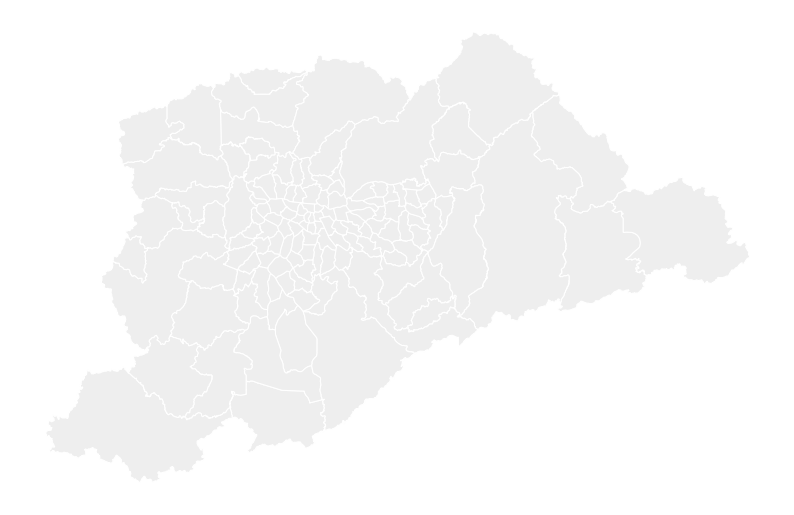

In [170]:
# Colorir preenchimentos (fill) e linhas (stroke ou line ou egde)
ax = distritos.plot(figsize=(10,10), color='#eeeeee', edgecolor='white', linewidth=0.8)
ax.axis("off")

(7332315.516704407, 7440526.498143018)

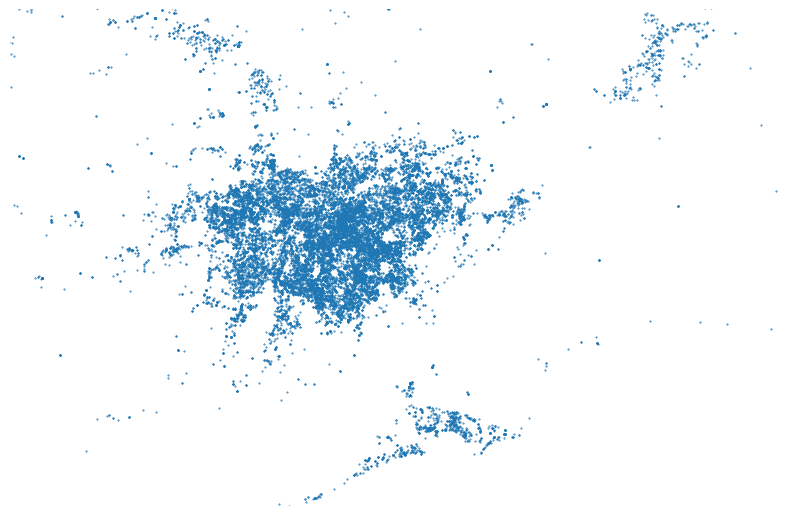

In [171]:
ax_veiculos = gdf.to_crs(epsg=5533).plot(figsize=(10,10),marker=".", markersize=0.8)
ax_veiculos.axis("off")

# Cortar o mapa nas coordenadas desejada (antes era o estado inteiro, agora ta com as mesmas coords da RMSP)
ax_veiculos.set_xlim([267602.9776466094, 436846.4673005015])
ax_veiculos.set_ylim([7332315.516704407, 7440526.498143018])

### Juntando dados espaciais - Parte 1

In [172]:
# Column join - Juncao de tabelas (datasets) baseado em colunas em comum
# Spatial join = Juncao de tabelas baseado na relacao dos elementos geometricos
# Exemplo: ler info do poligono em que pontos estao inseridos
# Vamos encontrar em quais municipios os veiculos foram roubados

# Primeiro passo? garantimos que os crs's sao iguais entre as instancias que compararemos
gdf = gdf.to_crs(5533)
distritos = distritos.to_crs(5533)

# unimos as instancias usando o metodo sjoin
# ordem 
# how: ineer -> [left ou ineer] -> left "deixe os elementos que nao tem relacao" | inner "mantenha apenas elementos com relacao"
# op: within -> [within, ...] -> within "encontre os elementos que estao DENTRO do outro"
veiculos_municipios = gpd.sjoin(gdf, distritos, how='inner', predicate='within').dissolve('NomeDistri')
veiculos_municipios.head()

,geometry,ID_DELEGACIA,NOME_DEPARTAMENTO,NOME_SECCIONAL,NOME_DELEGACIA,NOME_MUNICIPIO,ANO_BO,NUM_BO,VERSAO,CIDADE,...,DESCR_TIPO_VEICULO,DESCR_MARCA_VEICULO,ANO_FABRICACAO,ANO_MODELO,DESC_COR_VEICULO,MÊS,ANO,index_right,NumeroDist,Area_ha
NomeDistri,,,,,,,,,,,,,,,,,,,,,
Alto de Pinheiros,"MULTIPOINT (323302.262 7395362.802, 324013.542...",30441,DEMACRO,DEL.SEC.CARAPICUIBA,01º D.P. BARUERI,S.PAULO,2023,DF9324,1,S.PAULO,...,Motociclo,HONDA/CG 160 FAN,2020.0,2021.0,Prata,3,2023,1,2,751.26
Anhanguera,"MULTIPOINT (313979.768 7410080.699, 314454.617...",30118,DEMACRO,DEL.SEC.SANTO ANDRÉ,DEL.POL.RIO GRANDE DA SERRA,S.PAULO,2023,CX3546,2,S.PAULO,...,Semi-reboque,SR/RANDON SR FG,2004.0,2005.0,Branco,3,2023,2,3,3339.95
Aricanduva,"MULTIPOINT (343769.240 7392390.403, 343798.017...",20231,DECAP,DEL.SEC.5º LESTE,31º D.P. VILA CARRAO,S.PAULO,2023,CT9005,1,S.PAULO,...,Automovel,FIAT/ARGO DRIVE 1.0,2021.0,2022.0,Branco,3,2023,3,4,686.26
Artur Alvim,"MULTIPOINT (346873.624 7394945.272, 346877.296...",10326,DECAP,DEL.SEC.7º ITAQUERA,63º D.P. VILA JACUI,S.PAULO,2023,DQ8990,2,S.PAULO,...,Automovel,FIAT/PALIO FIRE FLEX,2008.0,2008.0,Prata,3,2023,4,5,653.04
Arujá,"MULTIPOINT (360115.573 7410841.555, 360344.875...",30206,DEMACRO,DEL.SEC.GUARULHOS,01º D.P. GUARULHOS,ARUJA,2023,CW5247,1,ARUJA,...,Caminhão,M.BENZ/ATEGO 2426,2013.0,2013.0,Branco,3,2023,96,97,9633.56


In [173]:
# Column join - Juncao de tabelas (datasets) baseado em colunas em comum
# Spatial join = Juncao de tabelas baseado na relacao dos elementos geometricos
# Exemplo: ler info do poligono em que pontos estao inseridos
# Vamos encontrar em quais municipios os veiculos foram roubados

# Primeiro passo? garantimos que os crs's sao iguais entre as instancias que compararemos
gdf = gdf.to_crs(5533)
distritos = distritos.to_crs(5533)

# unimos as instancias usando o metodo sjoin
# ordem 
# how: ineer -> [left ou ineer] -> left "deixe os elementos que nao tem relacao" | inner "mantenha apenas elementos com relacao"
# op: within -> [within, ...] -> within "encontre os elementos que estao DENTRO do outro"
veiculos_municipios = gpd.sjoin(gdf, distritos, how='inner', predicate='within')
veiculos_municipios.head()

,ID_DELEGACIA,NOME_DEPARTAMENTO,NOME_SECCIONAL,NOME_DELEGACIA,NOME_MUNICIPIO,ANO_BO,NUM_BO,VERSAO,CIDADE,ID_CIRCUNSCRICAO,...,ANO_FABRICACAO,ANO_MODELO,DESC_COR_VEICULO,MÊS,ANO,geometry,index_right,NumeroDist,NomeDistri,Area_ha
0,900020,DIPOL - DEPTO DE INTELIGENCIA,DELEGACIA ELETRONICA,DELEGACIA ELETRONICA,S.PAULO,2023,CV1119,2,S.PAULO,10101,...,2010.0,NaN,Prata,3,2023,POINT (333523.969 7394097.830),79,80,Sé,218.5
3,900020,DIPOL - DEPTO DE INTELIGENCIA,DELEGACIA ELETRONICA,DELEGACIA ELETRONICA,S.PAULO,2023,CZ0682,1,S.PAULO,10101,...,2012.0,NaN,Preta,3,2023,POINT (333607.780 7395763.694),79,80,Sé,218.5
7,900020,DIPOL - DEPTO DE INTELIGENCIA,DELEGACIA ELETRONICA,DELEGACIA ELETRONICA,S.PAULO,2023,DI3981,1,S.PAULO,10101,...,2013.0,NaN,Azul,3,2023,POINT (333571.518 7395625.189),79,80,Sé,218.5
9,10108,DECAP,DEL.SEC.1º CENTRO,08º D.P. BRAS,S.PAULO,2023,DV8090,1,S.PAULO,10101,...,2012.0,2013.0,Preta,3,2023,POINT (333632.086 7394954.017),79,80,Sé,218.5
10,900020,DIPOL - DEPTO DE INTELIGENCIA,DELEGACIA ELETRONICA,DELEGACIA ELETRONICA,S.PAULO,2023,DV8967,1,S.PAULO,10101,...,2009.0,NaN,Vermelho,3,2023,POINT (333574.459 7395662.574),79,80,Sé,218.5


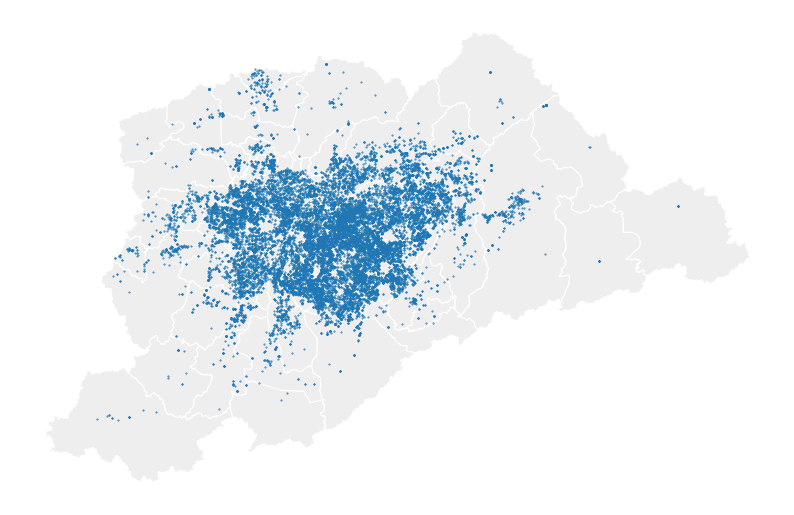

In [174]:
base = distritos.plot(figsize=(10,10), color='#eeeeee', edgecolor='white', linewidth=0.8)
base.axis("off")

ax_veiculos_municipios = veiculos_municipios.plot(
    figsize=(10,10),
    ax=base,
    marker=".",
    markersize=0.8
)

In [175]:
# Contagem de veiculos para cada um dos distritos
veiculos_municipios['NomeDistri'].value_counts()

NomeDistri
Santo André              1169
Osasco                   1133
Guarulhos                1097
São Bernardo do Campo    1065
Diadema                   607
                         ... 
Rio Grande da Serra        10
Pirapora do Bom Jesus       9
Salesópolis                 5
Biritiba-Mirim              5
Marsilac                    2
Name: count, Length: 134, dtype: int64

In [176]:
# Contagem considerando uma condicao. Veiculos pratas por distritos
veiculos_municipios[veiculos_municipios['DESC_COR_VEICULO'] == 'Prata']['NomeDistri'].value_counts()

NomeDistri
Osasco                   211
Guarulhos                209
São Bernardo do Campo    207
Santo André              200
Diadema                  116
                        ... 
Biritiba-Mirim             2
Juquitiba                  2
Moema                      1
Guararema                  1
Santa Isabel               1
Name: count, Length: 131, dtype: int64

### Juntando dados espaciais - Parte 2

In [177]:
# juncao das tabelas de veiculos com distritos (usamos WITHIN)
# how=inner -> mostrar apenas os itens em que veiculos esta dentro de um dos distritos da tabela de distritos
# Recebemos como resposta uma tabela com 23116 linhas, 54 colunas
# infos dos veiculos | geometria (ponto) | infos dos distritos
veiculos_com_distritos = gpd.sjoin(gdf, distritos, how='inner', predicate='within')
veiculos_com_distritos.head(7)

,ID_DELEGACIA,NOME_DEPARTAMENTO,NOME_SECCIONAL,NOME_DELEGACIA,NOME_MUNICIPIO,ANO_BO,NUM_BO,VERSAO,CIDADE,ID_CIRCUNSCRICAO,...,ANO_FABRICACAO,ANO_MODELO,DESC_COR_VEICULO,MÊS,ANO,geometry,index_right,NumeroDist,NomeDistri,Area_ha
0,900020,DIPOL - DEPTO DE INTELIGENCIA,DELEGACIA ELETRONICA,DELEGACIA ELETRONICA,S.PAULO,2023,CV1119,2,S.PAULO,10101,...,2010.0,NaN,Prata,3,2023,POINT (333523.969 7394097.830),79,80,Sé,218.5
3,900020,DIPOL - DEPTO DE INTELIGENCIA,DELEGACIA ELETRONICA,DELEGACIA ELETRONICA,S.PAULO,2023,CZ0682,1,S.PAULO,10101,...,2012.0,NaN,Preta,3,2023,POINT (333607.780 7395763.694),79,80,Sé,218.5
7,900020,DIPOL - DEPTO DE INTELIGENCIA,DELEGACIA ELETRONICA,DELEGACIA ELETRONICA,S.PAULO,2023,DI3981,1,S.PAULO,10101,...,2013.0,NaN,Azul,3,2023,POINT (333571.518 7395625.189),79,80,Sé,218.5
9,10108,DECAP,DEL.SEC.1º CENTRO,08º D.P. BRAS,S.PAULO,2023,DV8090,1,S.PAULO,10101,...,2012.0,2013.0,Preta,3,2023,POINT (333632.086 7394954.017),79,80,Sé,218.5
10,900020,DIPOL - DEPTO DE INTELIGENCIA,DELEGACIA ELETRONICA,DELEGACIA ELETRONICA,S.PAULO,2023,DV8967,1,S.PAULO,10101,...,2009.0,NaN,Vermelho,3,2023,POINT (333574.459 7395662.574),79,80,Sé,218.5
11,10101,DECAP,DEL.SEC.1º CENTRO,01º D.P. SE,S.PAULO,2023,DY2229,1,S.PAULO,10101,...,2016.0,2017.0,Preta,3,2023,POINT (333178.244 7394838.828),79,80,Sé,218.5
13,10101,DECAP,DEL.SEC.1º CENTRO,01º D.P. SE,S.PAULO,2023,EE3076,1,S.PAULO,10101,...,2009.0,2009.0,Branco,3,2023,POINT (333932.900 7394403.831),79,80,Sé,218.5


In [178]:
# juncao das tabelas de distritos com veiculos (usamos CONTAINS)
# how=inner -> mostrar apenas os itens em que veiculos esta dentro de um dos distritos da tabela de distritos
# Recebemos como resposta uma tabela com 23116 linhas, 54 colunas
# infos dos distritos | geometria (poligono) | infos do veiculo
distritos_com_veiculos = gpd.sjoin(distritos, gdf, how='inner', predicate='contains')
distritos_com_veiculos.head(7)

,NumeroDist,NomeDistri,Area_ha,geometry,index_right,ID_DELEGACIA,NOME_DEPARTAMENTO,NOME_SECCIONAL,NOME_DELEGACIA,NOME_MUNICIPIO,...,LONGITUDE,CONT_VEICULO,DESCR_OCORRENCIA_VEICULO,DESCR_TIPO_VEICULO,DESCR_MARCA_VEICULO,ANO_FABRICACAO,ANO_MODELO,DESC_COR_VEICULO,MÊS,ANO
0,1,Água Rasa,715.05,"POLYGON Z ((341442.541 7392734.255 0.000, 3414...",22932,900020,DIPOL - DEPTO DE INTELIGENCIA,DELEGACIA ELETRONICA,DELEGACIA ELETRONICA,S.PAULO,...,-46.562422,1001090035,Furtado,Automovel,I/CITROEN C4 20 VTR,2006.0,NaN,Preta,4,2023
0,1,Água Rasa,715.05,"POLYGON Z ((341442.541 7392734.255 0.000, 3414...",22987,900020,DIPOL - DEPTO DE INTELIGENCIA,DELEGACIA ELETRONICA,DELEGACIA ELETRONICA,S.PAULO,...,-46.566134,1001144327,Furtado,Automovel,RENAULT/SANDERO EXPR 16,2015.0,NaN,Prata,4,2023
0,1,Água Rasa,715.05,"POLYGON Z ((341442.541 7392734.255 0.000, 3414...",22962,900020,DIPOL - DEPTO DE INTELIGENCIA,DELEGACIA ELETRONICA,DELEGACIA ELETRONICA,S.PAULO,...,-46.563616,1001113758,Furtado,Motociclo,HONDA/NXR160 BROS ESDD,2021.0,NaN,Branco,4,2023
0,1,Água Rasa,715.05,"POLYGON Z ((341442.541 7392734.255 0.000, 3414...",22949,900020,DIPOL - DEPTO DE INTELIGENCIA,DELEGACIA ELETRONICA,DELEGACIA ELETRONICA,S.PAULO,...,-46.563436,1001105210,Furtado,Automovel,HYUNDAI/CRETA 16A ATTITU,2019.0,NaN,Branco,4,2023
0,1,Água Rasa,715.05,"POLYGON Z ((341442.541 7392734.255 0.000, 3414...",3791,900020,DIPOL - DEPTO DE INTELIGENCIA,DELEGACIA ELETRONICA,DELEGACIA ELETRONICA,S.PAULO,...,-46.565277,1000985898,Furtado,Não informado,GM/CHEVROLET 10,2018.0,NaN,Branco,3,2023
0,1,Água Rasa,715.05,"POLYGON Z ((341442.541 7392734.255 0.000, 3414...",3857,900020,DIPOL - DEPTO DE INTELIGENCIA,DELEGACIA ELETRONICA,DELEGACIA ELETRONICA,S.PAULO,...,-46.563197,1001041054,Furtado,Automovel,JEEP/RENEGADE 1.8 AT,2019.0,NaN,Prata,3,2023
0,1,Água Rasa,715.05,"POLYGON Z ((341442.541 7392734.255 0.000, 3414...",3818,10310,DECAP,DEL.SEC.5º LESTE,56º D.P. VILA ALPINA,S.PAULO,...,-46.566853,1001005295,Localizado / Entregue,Motociclo,HONDA/CB 500X,2019.0,2019.0,Laranja,3,2023


In [179]:
# juncao das tabelas de veiculos com distritos (usamos WITHIN)
# how=left -> mostrar todos os veiculos, mesmo que nao esteja dentro de nenhum dos distritos
# Recebemos como resposta uma tabela com 36850 linhas, 54 colunas (verificar item 5)
# infos dos veiculos | geometria (ponto) | infos dos distritos
veiculos_com_distritos = gpd.sjoin(gdf, distritos, how='left', predicate='within')
veiculos_com_distritos.head(7)

,ID_DELEGACIA,NOME_DEPARTAMENTO,NOME_SECCIONAL,NOME_DELEGACIA,NOME_MUNICIPIO,ANO_BO,NUM_BO,VERSAO,CIDADE,ID_CIRCUNSCRICAO,...,ANO_FABRICACAO,ANO_MODELO,DESC_COR_VEICULO,MÊS,ANO,geometry,index_right,NumeroDist,NomeDistri,Area_ha
0,900020,DIPOL - DEPTO DE INTELIGENCIA,DELEGACIA ELETRONICA,DELEGACIA ELETRONICA,S.PAULO,2023,CV1119,2,S.PAULO,10101,...,2010.0,NaN,Prata,3,2023,POINT (333523.969 7394097.830),79.0,80.0,Sé,218.50
1,900020,DIPOL - DEPTO DE INTELIGENCIA,DELEGACIA ELETRONICA,DELEGACIA ELETRONICA,S.PAULO,2023,CX8069,1,S.PAULO,10101,...,2017.0,NaN,Vermelho,3,2023,POINT (332941.752 7393668.793),48.0,49.0,Liberdade,364.41
2,10308,DECAP,DEL.SEC.5º LESTE,52º D.P. PARQUE S.JORGE,S.PAULO,2023,CY4504,1,S.PAULO,10101,...,2011.0,2012.0,Preta,3,2023,POINT (333867.587 7394020.498),48.0,49.0,Liberdade,364.41
3,900020,DIPOL - DEPTO DE INTELIGENCIA,DELEGACIA ELETRONICA,DELEGACIA ELETRONICA,S.PAULO,2023,CZ0682,1,S.PAULO,10101,...,2012.0,NaN,Preta,3,2023,POINT (333607.780 7395763.694),79.0,80.0,Sé,218.50
4,900020,DIPOL - DEPTO DE INTELIGENCIA,DELEGACIA ELETRONICA,DELEGACIA ELETRONICA,S.PAULO,2023,CZ6562,1,S.PAULO,10101,...,2022.0,NaN,Vermelho,3,2023,POINT (333114.716 7393828.916),48.0,49.0,Liberdade,364.41
5,900020,DIPOL - DEPTO DE INTELIGENCIA,DELEGACIA ELETRONICA,DELEGACIA ELETRONICA,S.PAULO,2023,DG9248,1,S.PAULO,10101,...,2020.0,NaN,Preta,3,2023,POINT EMPTY,NaN,NaN,NaN,NaN
6,900020,DIPOL - DEPTO DE INTELIGENCIA,DELEGACIA ELETRONICA,DELEGACIA ELETRONICA,S.PAULO,2023,DG9286,1,S.PAULO,10101,...,2011.0,NaN,Cinza,3,2023,POINT (333788.632 7393667.654),48.0,49.0,Liberdade,364.41


In [180]:
# juncao das tabelas de distritos com veiculos (usamos CONTAINS)
# how=left -> se tivessemos distritos sem veiculos eles apareceriam na tabela
# Recebemos como resposta uma tabela com 23116 linhas, 54 colunas
# infos dos distritos | geometria (poligono) | infos do veiculo
distritos_com_veiculos = gpd.sjoin(distritos, gdf, how='left', predicate='contains')
distritos_com_veiculos.head(7)

,NumeroDist,NomeDistri,Area_ha,geometry,index_right,ID_DELEGACIA,NOME_DEPARTAMENTO,NOME_SECCIONAL,NOME_DELEGACIA,NOME_MUNICIPIO,...,LONGITUDE,CONT_VEICULO,DESCR_OCORRENCIA_VEICULO,DESCR_TIPO_VEICULO,DESCR_MARCA_VEICULO,ANO_FABRICACAO,ANO_MODELO,DESC_COR_VEICULO,MÊS,ANO
0,1,Água Rasa,715.05,"POLYGON Z ((341442.541 7392734.255 0.000, 3414...",22932,900020,DIPOL - DEPTO DE INTELIGENCIA,DELEGACIA ELETRONICA,DELEGACIA ELETRONICA,S.PAULO,...,-46.562422,1001090035,Furtado,Automovel,I/CITROEN C4 20 VTR,2006.0,NaN,Preta,4,2023
0,1,Água Rasa,715.05,"POLYGON Z ((341442.541 7392734.255 0.000, 3414...",22987,900020,DIPOL - DEPTO DE INTELIGENCIA,DELEGACIA ELETRONICA,DELEGACIA ELETRONICA,S.PAULO,...,-46.566134,1001144327,Furtado,Automovel,RENAULT/SANDERO EXPR 16,2015.0,NaN,Prata,4,2023
0,1,Água Rasa,715.05,"POLYGON Z ((341442.541 7392734.255 0.000, 3414...",22962,900020,DIPOL - DEPTO DE INTELIGENCIA,DELEGACIA ELETRONICA,DELEGACIA ELETRONICA,S.PAULO,...,-46.563616,1001113758,Furtado,Motociclo,HONDA/NXR160 BROS ESDD,2021.0,NaN,Branco,4,2023
0,1,Água Rasa,715.05,"POLYGON Z ((341442.541 7392734.255 0.000, 3414...",22949,900020,DIPOL - DEPTO DE INTELIGENCIA,DELEGACIA ELETRONICA,DELEGACIA ELETRONICA,S.PAULO,...,-46.563436,1001105210,Furtado,Automovel,HYUNDAI/CRETA 16A ATTITU,2019.0,NaN,Branco,4,2023
0,1,Água Rasa,715.05,"POLYGON Z ((341442.541 7392734.255 0.000, 3414...",3791,900020,DIPOL - DEPTO DE INTELIGENCIA,DELEGACIA ELETRONICA,DELEGACIA ELETRONICA,S.PAULO,...,-46.565277,1000985898,Furtado,Não informado,GM/CHEVROLET 10,2018.0,NaN,Branco,3,2023
0,1,Água Rasa,715.05,"POLYGON Z ((341442.541 7392734.255 0.000, 3414...",3857,900020,DIPOL - DEPTO DE INTELIGENCIA,DELEGACIA ELETRONICA,DELEGACIA ELETRONICA,S.PAULO,...,-46.563197,1001041054,Furtado,Automovel,JEEP/RENEGADE 1.8 AT,2019.0,NaN,Prata,3,2023
0,1,Água Rasa,715.05,"POLYGON Z ((341442.541 7392734.255 0.000, 3414...",3818,10310,DECAP,DEL.SEC.5º LESTE,56º D.P. VILA ALPINA,S.PAULO,...,-46.566853,1001005295,Localizado / Entregue,Motociclo,HONDA/CB 500X,2019.0,2019.0,Laranja,3,2023


### Construindo mapa de distribuicao de veiculos por distritos

In [181]:
veiculos_com_distritos = gpd.sjoin(gdf, distritos, how='inner', predicate='within')
veiculos_com_distritos.head(5)

,ID_DELEGACIA,NOME_DEPARTAMENTO,NOME_SECCIONAL,NOME_DELEGACIA,NOME_MUNICIPIO,ANO_BO,NUM_BO,VERSAO,CIDADE,ID_CIRCUNSCRICAO,...,ANO_FABRICACAO,ANO_MODELO,DESC_COR_VEICULO,MÊS,ANO,geometry,index_right,NumeroDist,NomeDistri,Area_ha
0,900020,DIPOL - DEPTO DE INTELIGENCIA,DELEGACIA ELETRONICA,DELEGACIA ELETRONICA,S.PAULO,2023,CV1119,2,S.PAULO,10101,...,2010.0,NaN,Prata,3,2023,POINT (333523.969 7394097.830),79,80,Sé,218.5
3,900020,DIPOL - DEPTO DE INTELIGENCIA,DELEGACIA ELETRONICA,DELEGACIA ELETRONICA,S.PAULO,2023,CZ0682,1,S.PAULO,10101,...,2012.0,NaN,Preta,3,2023,POINT (333607.780 7395763.694),79,80,Sé,218.5
7,900020,DIPOL - DEPTO DE INTELIGENCIA,DELEGACIA ELETRONICA,DELEGACIA ELETRONICA,S.PAULO,2023,DI3981,1,S.PAULO,10101,...,2013.0,NaN,Azul,3,2023,POINT (333571.518 7395625.189),79,80,Sé,218.5
9,10108,DECAP,DEL.SEC.1º CENTRO,08º D.P. BRAS,S.PAULO,2023,DV8090,1,S.PAULO,10101,...,2012.0,2013.0,Preta,3,2023,POINT (333632.086 7394954.017),79,80,Sé,218.5
10,900020,DIPOL - DEPTO DE INTELIGENCIA,DELEGACIA ELETRONICA,DELEGACIA ELETRONICA,S.PAULO,2023,DV8967,1,S.PAULO,10101,...,2009.0,NaN,Vermelho,3,2023,POINT (333574.459 7395662.574),79,80,Sé,218.5


In [182]:
# Contagem de itens de veiculos para cada um dos distritos
veiculos_com_distritos['NomeDistri'].value_counts()

NomeDistri
Santo André              1169
Osasco                   1133
Guarulhos                1097
São Bernardo do Campo    1065
Diadema                   607
                         ... 
Rio Grande da Serra        10
Pirapora do Bom Jesus       9
Salesópolis                 5
Biritiba-Mirim              5
Marsilac                    2
Name: count, Length: 134, dtype: int64

In [183]:
# Transformamos o Nome do Distrito no index da tabela para que a insercao das contagens correspondesse corretamente ao item do distritio
distritos.set_index('NomeDistri', inplace=True)
distritos['Contagem veiculos'] = veiculos_com_distritos['NomeDistri'].value_counts()
distritos.head()

,NumeroDist,Area_ha,geometry,Contagem veiculos
NomeDistri,,,,
Água Rasa,1,715.05,"POLYGON Z ((341442.541 7392734.255 0.000, 3414...",263
Alto de Pinheiros,2,751.26,"POLYGON Z ((327297.488 7395023.787 0.000, 3272...",40
Anhanguera,3,3339.95,"POLYGON Z ((320119.027 7408115.730 0.000, 3201...",68
Aricanduva,4,686.26,"POLYGON Z ((346790.801 7391574.672 0.000, 3467...",163
Artur Alvim,5,653.04,"POLYGON Z ((349658.197 7395936.635 0.000, 3496...",118


In [184]:
distritos[5:10]

,NumeroDist,Area_ha,geometry,Contagem veiculos
NomeDistri,,,,
Barra Funda,6,589.80,"POLYGON Z ((331178.958 7398351.358 0.000, 3311...",114
Bela Vista,7,276.70,"POLYGON Z ((332907.353 7394010.824 0.000, 3329...",68
Belém,8,613.55,"POLYGON Z ((338888.057 7394834.845 0.000, 3388...",63
Bom Retiro,9,427.38,"POLYGON Z ((334140.905 7396514.121 0.000, 3341...",30
Brás,10,364.61,"POLYGON Z ((336269.473 7395187.670 0.000, 3362...",83


<Axes: >

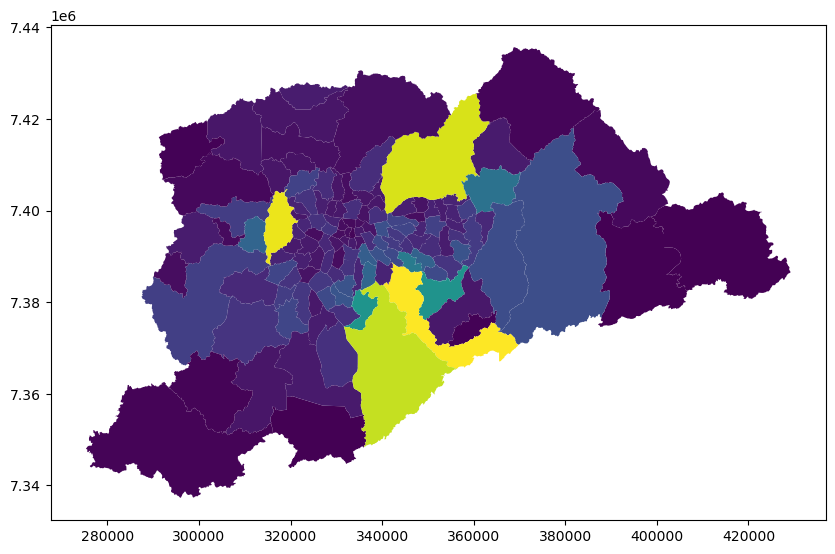

In [185]:
distritos.plot(figsize=(10, 10), column='Contagem veiculos')

In [186]:
# Resetamos o nome como coluna novamente
distritos.reset_index(inplace=True)
distritos.head()

,NomeDistri,NumeroDist,Area_ha,geometry,Contagem veiculos
0,Água Rasa,1,715.05,"POLYGON Z ((341442.541 7392734.255 0.000, 3414...",263
1,Alto de Pinheiros,2,751.26,"POLYGON Z ((327297.488 7395023.787 0.000, 3272...",40
2,Anhanguera,3,3339.95,"POLYGON Z ((320119.027 7408115.730 0.000, 3201...",68
3,Aricanduva,4,686.26,"POLYGON Z ((346790.801 7391574.672 0.000, 3467...",163
4,Artur Alvim,5,653.04,"POLYGON Z ((349658.197 7395936.635 0.000, 3496...",118
